In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

In [0]:
import tensorflow_datasets
mnist = tensorflow_datasets.load('mnist')

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
# make the hot enconde
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


ct = ColumnTransformer(
    transformers=[('OneHot', OneHotEncoder(), [0])],
    remainder='passthrough'
)

y_test = ct.fit_transform(y_test).toarray()
y_train = ct.fit_transform(y_train).toarray()

In [185]:
x_train[0].shape

(28, 28)

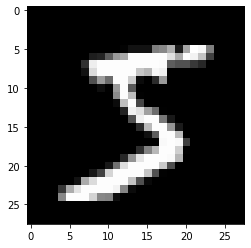

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap='gray')
# plt.title('Classe: ' + str( np.argmax(y_train[0][0] ) ))

Text(0.5, 1.0, 'Classe: 0')

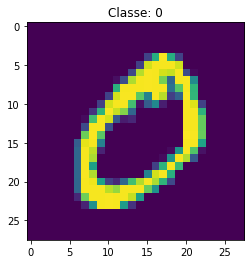

In [187]:
plt.imshow(x_train[1])
plt.title('Classe: ' + str( np.argmax(y_train[1] ) ))

In [0]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_batch, y_batch = 128, 64

In [189]:
# 28 * 28 (shape image) -> 784px
neurons_input = x_train.shape[1] # 784 neurons
neurons_input

784

In [0]:
# Formula to determine the total of neurons to layer:
# total_neurons = (number_features_layer_input + number_features_layer_out) / 2
neurons_first_layer_hidden = int(x_train.shape[1] + y_train.shape[1] / 2) 
neurons_second_layer_hidden = neurons_first_layer_hidden
neurons_third_layer_hidden = neurons_first_layer_hidden

# layer out
neurons_layer_out = y_train.shape[1]

# architecture neural network to mnist dataset
# 784 -> 397 -> 397 -> 397 -> 10

In [0]:
weights = {
    'hidden1': tf.Variable(tf.random_normal([neurons_input, neurons_first_layer_hidden])),
    'hidden2': tf.Variable(tf.random_normal([neurons_first_layer_hidden, neurons_second_layer_hidden])),
    'hidden3': tf.Variable(tf.random_normal([neurons_second_layer_hidden, neurons_third_layer_hidden])),
    'out': tf.Variable(tf.random_normal([neurons_third_layer_hidden, neurons_layer_out]))
}

In [0]:
bias = {
    'hidden1': tf.Variable(tf.random_normal([neurons_first_layer_hidden])),
    'hidden2': tf.Variable(tf.random_normal([neurons_second_layer_hidden])),
    'hidden3': tf.Variable(tf.random_normal([neurons_third_layer_hidden])),
    'out': tf.Variable(tf.random_normal([neurons_layer_out]))
}

In [0]:
x_placeholder = tf.placeholder('float', [None, 784])
y_placeholder = tf.placeholder('float', [None, neurons_layer_out])

In [0]:
def mlp(x, weight, bias):
  layer_hidden_1 =  tf.nn.relu( tf.add( tf.matmul(x, weight['hidden1']), bias['hidden1'] ) )
  layer_hidden_2 =  tf.nn.relu( tf.add( tf.matmul(layer_hidden_1, weight['hidden2']), bias['hidden2'] ) )
  layer_hidden_3 =  tf.nn.relu( tf.add( tf.matmul(layer_hidden_2, weight['hidden3']), bias['hidden3'] ) )
  layer_out = tf.add( tf.matmul(layer_hidden_3, weight['out']), bias['out'] )
  return layer_out

In [0]:
model = mlp(x_placeholder, weights, bias)

# cross entropy make the calculum better than the mean square error calculation in deep learning scenaries
error = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits= model, labels = y_placeholder) )
optimizer = tf.train.AdamOptimizer(learning_rate = 0.0001).minimize(error)

In [0]:
previsions = tf.nn.softmax(model)
right_previsions = tf.equal( tf.argmax(previsions, 1), tf.argmax(y_placeholder, 1) )
hit_rate = tf.reduce_mean(tf.cast(right_previsions, tf.float32))

In [197]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  batch_total = int(len(x_train) / 128)
  x_batches = np.array_split(x_train, batch_total)
  y_batches = np.array_split(y_train, batch_total)

  for epoch in range(10000):
    error_medium = 0.0

    x_batch, y_batch = x_batches[i], y_batches[i]
    _, cost = sess.run([optimizer, error], feed_dict= { x_placeholder: x_batch, y_placeholder: y_batch})

    if epoch % 1000 == 0:
      acc = sess.run([hit_rate], feed_dict={ x_placeholder: x_test, y_placeholder: y_test })
      print('Epoch: ' + str(epoch + 1) + ' error: ' + str(cost) + ' acc: ' + str(acc) )
  print('Training done!')
  print(sess.run(hit_rate, feed_dict={ x_placeholder: x_test, y_placeholder: y_test }))

Epoch: 1 error: 37387520.0 acc: [0.0995]
Epoch: 1001 error: 0.0 acc: [0.2785]
Epoch: 2001 error: 0.0 acc: [0.2785]
Epoch: 3001 error: 0.0 acc: [0.2785]
Epoch: 4001 error: 0.0 acc: [0.2785]


KeyboardInterrupt: ignored